# Google Playstore Data
# Complete EDA analysis for Beginners to Advance

**About Dataset**\
Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**\
Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**\
This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**\
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# This for jupyter notebook to show the plot itself

# 2. Data Loading and Exploration and Cleaning

--Load the CSV file with pandas\
--Creating the dataframe and understanding the data present in teh dataset using pandas\
--Dealing with the missing data,outliers and teh incorrect records\


In [409]:
df=pd.read_csv('googleplaystore.csv')

-- Viewing the  top 5 rows of the data

In [410]:
df.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play    15-Jan-18               2.0.0  4.0.3 and up  
2               Art & Design     1-Aug-18               1.2.4  4.0.3 and up  
3               Art & Design     8-Jun-18  Varies with device    4.2 and up  
4    Art & Design;Creativity    20-Jun-18                 1.1    4.4 and up

# Important things to Know
## Set Maximums for rows and columns

In [411]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Hide all warnings

In [412]:
import warnings
warnings.filterwarnings ('ignore')

--Lets see the exact column names which can be easily copied later on from Google Playstore Dataset

In [413]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Alternative way

In [414]:
print(f"The names of columns in this dataset are as follows: {df.columns}") 

The names of columns in this dataset are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


-- Let's have a look on the shape of the dataset

In [415]:
df.shape

(10841, 13)

# Alternative Way

In [416]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}")

The Number of Rows are 10841, and columns are 13


-- Not enough,Let's have a look on the columns and their data types using detailed info function

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# Observations
1.There are 10841 rows and 13 columns in the dataset\
2.The Columns are of different data types\
3.The columns in the dataset are:\
        'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'\
4.There are some missing values in the dataset which we will read in details and deal later on in the notebook.\
5.There are some columns which are of object data type but they should be of numeric data type,we will convert them late on in the notebook\
'Size','Installs','Price'



In [418]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play    15-Jan-18               2.0.0  4.0.3 and up  
2               Art & Design     1-Aug-18               1.2.4  4.0.3 and up  
3               Art & Design     8-Jun-18  Varies with device    4.2 and up  
4    Art & Design;Creativity    20-Jun-18                 1.1    4.4 and up

In [419]:
df.describe()

Rating       Reviews
count  9367.000000  1.084100e+04
mean      4.191513  4.441119e+05
std       0.515735  2.927629e+06
min       1.000000  0.000000e+00
25%       4.000000  3.800000e+01
50%       4.300000  2.094000e+03
75%       4.500000  5.476800e+04
max       5.000000  7.815831e+07

# Observation
-- We have only 2 columns as numeric data type,rest all are object data type (according to python),but we can see that 'Size', 'Installs','Price' are also numeric, we must convert them to numeric data type in data wrangling process.

-Lets Clean the Size Column First

- How to make 'Size' Column as Numeric Column

In [420]:
# Check for null values
df['Size'].isnull().sum()

0

In [421]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.9M                    62
3.8M                    62
4

In [422]:
#No Null value we are good to go
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---------------
## Observations
1.  Varies with device
2.  M
3.  k

-- There are several unique values in the size columns,We have to first make the unit into one common unit from M and K to bytes,and then remove the M and K from the values and convert them into numeric data type.

In [423]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [424]:
df['Size'].isnull().sum()

0

# NO missing value in size,we are good to go.

# Next verify the number of values and 3 different kind of values

In [425]:
# Find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts()

11M      198
12M      196
14M      194
13M      191
15M      184
17M      160
19M      154
16M      149
26M      149
25M      143
20M      139
21M      138
10M      136
24M      136
18M      133
23M      117
22M      114
29M      103
27M       97
28M       95
30M       84
33M       79
3.3M      77
37M       76
35M       72
31M       70
2.9M      69
2.3M      68
2.5M      68
3.4M      65
2.8M      65
34M       63
32M       63
3.7M      63
40M       62
3.8M      62
3.0M      62
3.9M      62
4.0M      61
44M       61
36M       60
4.2M      59
48M       59
46M       59
5.0M      58
3.6M      57
39M       56
3.1M      56
3.2M      55
38M       55
4.3M      54
2.7M      53
4.1M      52
2.0M      51
5.4M      51
3.5M      51
4.9M      50
1.8M      50
2.6M      50
5.7M      48
1.5M      48
41M       48
2.4M      48
43M       47
4.6M      46
49M       45
2.2M      45
6.3M      45
5.3M      44
50M       44
5.1M      43
53M       43
4.4M      42
63M       41
1.2M      41
42M       41
45M       40

In [426]:
# Now count with sum also
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [427]:
# Find the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts()

201k     3
79k      3
118k     3
375k     3
266k     3
656k     2
196k     2
592k     2
51k      2
26k      2
364k     2
192k     2
17k      2
72k      2
335k     2
318k     2
228k     2
417k     2
842k     2
33k      2
70k      2
957k     2
473k     2
172k     2
206k     2
58k      2
141k     2
948k     2
18k      2
334k     2
704k     2
29k      2
323k     2
103k     1
601k     1
221k     1
153k     1
116k     1
108k     1
940k     1
743k     1
898k     1
176k     1
28k      1
629k     1
663k     1
288k     1
34k      1
942k     1
259k     1
164k     1
551k     1
458k     1
245k     1
514k     1
400k     1
801k     1
209k     1
787k     1
237k     1
50k      1
411k     1
122k     1
643k     1
809k     1
597k     1
173k     1
986k     1
97k      1
516k     1
837k     1
785k     1
780k     1
961k     1
269k     1
499k     1
20k      1
498k     1
600k     1
749k     1
353k     1
642k     1
881k     1
775k     1
608k     1
636k     1
470k     1
170k     1
160k     1
144k     1
143k     1

In [428]:
# Now count k with sum also
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [429]:
# Find the values having "Varies with device" in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts()

Varies with device    1695
Name: Size, dtype: int64

In [430]:
# Now count Varies with device with sum also
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [431]:
# Taking sum of all the values in size column which has 'M','K' and 'varies with device in it
# Sum of 3 Values
8830 + 316 + 1695

10841

In [432]:
len(df)

10841

--We have 8830 values in M units\
--we have 316 values in k units\
--We have 1695 value in Varies with device\
''Let's convert the M and K units into bytes and then remove the M and k from the values and convert them into numeric data type

In [433]:
#convert the size column to numeric by multiplyting the values with 1024 if it has 'k' in it ...
#this function will convert the size column to numeric
# Lets define a function
def convert_size(size):
    # add function details here
    '''
     function wil convert the size column to numeric by multiplying the values with 1024
    '''
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', "")) * 1024
        elif 'M' in size:
            return float(size.replace('M', "")) * 1024 * 2024
        elif 'Varies with device' in size:
            return np.nan
    return size



In [434]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [435]:
# Let apply the above function def convert_size(size):
df['Size']=df['Size'].apply(convert_size)

In [436]:
df['Size']

0         39378944.0
1         29016064.0
2         18031411.2
3         51814400.0
4          5803212.8
5         11606425.6
6         39378944.0
7         60104704.0
8         68395008.0
9          6424985.6
10        58032128.0
11        24870912.0
12        41451520.0
13        43524096.0
14        76685312.0
15         5595955.2
16        11399168.0
17        35233792.0
18        80830464.0
19        64249856.0
20        29016064.0
21        24870912.0
22         8704819.2
23        14508032.0
24        47669248.0
25        12435456.0
26        51814400.0
27        12642713.6
28         9533849.6
29         8704819.2
30        19067699.2
31        10777395.2
32        22798336.0
33        22798336.0
34         8704819.2
35        19067699.2
36        49741824.0
37               NaN
38        22798336.0
39        19482214.4
40        31088640.0
41        20725760.0
42               NaN
43         2487091.2
44        24870912.0
45        49741824.0
46        53886976.0
47        165

# Rename the Column

In [437]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': "Size_in_Bytes"}, inplace=True)

In [438]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_Bytes     Installs  Type Price Content Rating  \
0      159     39378944.0      10,000+  Free     0       Everyone   
1      967     29016064.0     500,000+  Free     0       Everyone   
2    87510     18031411.2   5,000,000+  Free     0       Everyone   
3   215644     51814400.0  50,000,000+  Free     0           Teen   
4      967      5803212.8     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play    15-Jan-18               2.0.0  4.0.3 and up  
2               Art & Design     1-Aug-18               1.2.4  4.0.3 and up  
3               Art & Design     8-Jun-18  Varies with device    4.2 and up  
4    Art & Design;Creativity    20-Jun-18                 1.1    4.4 and up

In [439]:
# making the column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb']=df['Size_in_Bytes'].apply(lambda x: x/(1024*1024))


In [440]:
# making the column called 'Size in Kb' which will have the size in Kb
df['Size_in_Kb']=df['Size_in_Bytes'].apply(lambda x: x/(1024))


In [441]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_Bytes     Installs  Type Price Content Rating  \
0      159     39378944.0      10,000+  Free     0       Everyone   
1      967     29016064.0     500,000+  Free     0       Everyone   
2    87510     18031411.2   5,000,000+  Free     0       Everyone   
3   215644     51814400.0  50,000,000+  Free     0           Teen   
4      967      5803212.8     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play    15-Jan-18               2.0.0  4.0.3 and up   
2               Art & Design     1-Aug-18               1.2.4  4.0.3 and up   
3               Art & Design     8-Jun-18  Varies with device    4.2 and up   
4    Art & Design;Creativity    20-Jun-18                 1.1    4.4 and up   

   Size_in_Mb  Size_in_Kb  
0   37.554688     38456.0  
1   27.671875     28336.0  
2   17.196094     17608.8  
3   49.414062     50600.0  
4    5.534375      5667.2

-- Now we have converted every value into bytes and removed the M and K from the values and converted them into numeric data type.\
-- 'Varies with device' was a string value ,therefore we intentionally converted them into null values,which we can fill later on according to our needs.

-- Let's have a look on teh installs column

In [442]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [443]:
# Lets have a value counts
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [444]:
df['Installs'].isnull().sum()

0

# Observations of Installs Column
1. Remove + Sign
2. remove,
3. Convert the Column into an integer

In [445]:
# find the many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10840

In [446]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [447]:
# Total value in installs column
df['Installs'].value_counts().sum()

10841

-The only problem here is the + sign in the values,let's remove them and convert the column into numeric data type.\
-The total values in teh Installs column are 10841 and there are no null values in the columns.\
-However,one value 0 has no plus sign\
-Let's remove the plus sign + and, from the values and convert them into numeric data type

In [448]:
# remove the plus sign from install column and convert it to numeric
df['Installs']=df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)

In [449]:
# remove the ' from install column 
df['Installs']=df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)

In [450]:
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [451]:
# Check the head of the DataFrame
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_Bytes  Installs  Type Price Content Rating  \
0      159     39378944.0     10000  Free     0       Everyone   
1      967     29016064.0    500000  Free     0       Everyone   
2    87510     18031411.2   5000000  Free     0       Everyone   
3   215644     51814400.0  50000000  Free     0           Teen   
4      967      5803212.8    100000  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play    15-Jan-18               2.0.0  4.0.3 and up   
2               Art & Design     1-Aug-18               1.2.4  4.0.3 and up   
3               Art & Design     8-Jun-18  Varies with device    4.2 and up   
4    Art & Design;Creativity    20-Jun-18                 1.1    4.4 and up   

   Size_in_Mb  Size_in_Kb  
0   37.554688     38456.0  
1   27.671875     28336.0  
2   17.196094     17608.8  
3   49.414062     50600.0  
4    5.534375      5667.2

In [452]:
# This will show the datatypes of the column
df['Installs'].dtypes

dtype('int64')

In [453]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

- We can generate a new columns based on the installation values,which will be helpful in our analysis

In [454]:
# this will show the value counts of the column also
df['Installs'].max() #this will show the value counts of the column

1000000000

In [455]:
# making a new column called "Installs_category' which will have the category of the installs

bins = [-1, 0, 10, 1000, 100000, 1000000, 10000000, 100000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)


In [456]:
# check the value counts of new column
df['Installs_category'].value_counts() 


Moderate              3179
Low                   2162
More than moderate    2118
High                  2004
Very High              698
Very low               535
Top Notch              130
no                      15
Name: Installs_category, dtype: int64

In [457]:
df.describe()

Rating       Reviews  Size_in_Bytes      Installs   Size_in_Mb  \
count  9367.000000  1.084100e+04   9.146000e+03  1.084100e+04  9146.000000   
mean      4.191513  4.441119e+05   4.457416e+07  1.546291e+07    42.509231   
std       0.515735  2.927629e+06   4.683121e+07  8.502557e+07    44.661726   
min       1.000000  0.000000e+00   8.704000e+03  0.000000e+00     0.008301   
25%       4.000000  3.800000e+01   1.015562e+07  1.000000e+03     9.685156   
50%       4.300000  2.094000e+03   2.694349e+07  1.000000e+05    25.695312   
75%       4.500000  5.476800e+04   6.217728e+07  5.000000e+06    59.296875   
max       5.000000  7.815831e+07   2.072576e+08  1.000000e+09   197.656250   

          Size_in_Kb  
count    9146.000000  
mean    43529.452537  
std     45733.606949  
min         8.500000  
25%      9917.600000  
50%     26312.000000  
75%     60720.000000  
max    202400.000000

# Lets work with Price Column

In [458]:
# check the unique values in the 'Price Column'
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [459]:
df['Price'].value_counts()

0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$1.96           1
$19.40          1
$4.80           1
$3.28           1
$4.59           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$2.59           1
$3.90           1
$154.99         1
$4.60           1
$28.99          1
$2.95           1
$2.90           1
$1.97     

# Observation
1.Remove the Dollar Sign

In [460]:
# Let's see how many values have $ sign
df['Price'].loc[df['Price'].str.contains('$')].value_counts()

0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$1.96           1
$19.40          1
$4.80           1
$3.28           1
$4.59           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$2.59           1
$3.90           1
$154.99         1
$4.60           1
$28.99          1
$2.95           1
$2.90           1
$1.97     

In [461]:
# Count the values having $ in the 'Price' Column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [462]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

-- Now we can confirm that the only currancy used is $ in the price column or 0 value,as 800+10041= 10841 Total Values

-- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [463]:
#remove the dollar sign from the price column and convert it to numeric
df['Price']=df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [464]:
df['Price']

0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             0
38             0
39             0
40             0
41             0
42             0
43             0
44             0
45             0
46             0
47             0
48             0
49             0
50             0
51             0
52             0
53             0
54             0
55             0
56             0
57             0
58            

In [465]:
# convert the price column to numeric (float because this is the price)
df['Price']=df['Price'].apply(lambda x: float(x))

In [476]:
# this will show the data type of the column
df['Price'].dtype

dtype('float64')

In [466]:
df['Price']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
5          0.00
6          0.00
7          0.00
8          0.00
9          0.00
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17         0.00
18         0.00
19         0.00
20         0.00
21         0.00
22         0.00
23         0.00
24         0.00
25         0.00
26         0.00
27         0.00
28         0.00
29         0.00
30         0.00
31         0.00
32         0.00
33         0.00
34         0.00
35         0.00
36         0.00
37         0.00
38         0.00
39         0.00
40         0.00
41         0.00
42         0.00
43         0.00
44         0.00
45         0.00
46         0.00
47         0.00
48         0.00
49         0.00
50         0.00
51         0.00
52         0.00
53         0.00
54         0.00
55         0.00
56         0.00
57         0.00
58         0.00
59         0.00
60         0.00
61         0.00
62      

In [467]:
df.describe()

Rating       Reviews  Size_in_Bytes      Installs         Price  \
count  9367.000000  1.084100e+04   9.146000e+03  1.084100e+04  10841.000000   
mean      4.191513  4.441119e+05   4.457416e+07  1.546291e+07      1.027273   
std       0.515735  2.927629e+06   4.683121e+07  8.502557e+07     15.948971   
min       1.000000  0.000000e+00   8.704000e+03  0.000000e+00      0.000000   
25%       4.000000  3.800000e+01   1.015562e+07  1.000000e+03      0.000000   
50%       4.300000  2.094000e+03   2.694349e+07  1.000000e+05      0.000000   
75%       4.500000  5.476800e+04   6.217728e+07  5.000000e+06      0.000000   
max       5.000000  7.815831e+07   2.072576e+08  1.000000e+09    400.000000   

        Size_in_Mb     Size_in_Kb  
count  9146.000000    9146.000000  
mean     42.509231   43529.452537  
std      44.661726   45733.606949  
min       0.008301       8.500000  
25%       9.685156    9917.600000  
50%      25.695312   26312.000000  
75%      59.296875   60720.000000  
max     197.656250  202400.000000

In [468]:
# using f string print min,max and average prices of the app
print(f"Min price is {df['Price'].min()}")
print(f"Max price is {df['Price'].max()}")
print(f"Average price is {df['Price'].mean()}")

Min price is 0.0
Max price is 400.0
Average price is 1.0272733142699015


# 2.1. Descriptive Statistics

In [477]:
df.describe()

Rating       Reviews  Size_in_Bytes      Installs         Price  \
count  9367.000000  1.084100e+04   9.146000e+03  1.084100e+04  10841.000000   
mean      4.191513  4.441119e+05   4.457416e+07  1.546291e+07      1.027273   
std       0.515735  2.927629e+06   4.683121e+07  8.502557e+07     15.948971   
min       1.000000  0.000000e+00   8.704000e+03  0.000000e+00      0.000000   
25%       4.000000  3.800000e+01   1.015562e+07  1.000000e+03      0.000000   
50%       4.300000  2.094000e+03   2.694349e+07  1.000000e+05      0.000000   
75%       4.500000  5.476800e+04   6.217728e+07  5.000000e+06      0.000000   
max       5.000000  7.815831e+07   2.072576e+08  1.000000e+09    400.000000   

        Size_in_Mb     Size_in_Kb  
count  9146.000000    9146.000000  
mean     42.509231   43529.452537  
std      44.661726   45733.606949  
min       0.008301       8.500000  
25%       9.685156    9917.600000  
50%      25.695312   26312.000000  
75%      59.296875   60720.000000  
max     197.656250  202400.000000

# Observations
--Now,we have only 6 columns as numeric data type.

--We can observe their descriptive statistics, and make tons of observations as per our hypotheses.

--We can see that Rating column has a minimum value of 1 and a maximum value of 5,which is the range of rating,the mean is 4.19 which is good rating.On an average people give this rating.

--We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 78+ Millions,which is the range of reviews,and the mean is 444,111.93 which is good number of reviews.On an average people give this number of reviews to the apps,But it does not make sense to us,as we have different categories of apps.

--Similarly,we can observe the other columns as well.

Therefore,the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of app category and number of installs,reviews,ratings,etc.



## But even before that we have to think about the missing values of the dataset.


# 2.2 Missing Values

--Dealing with missing values is one of the most important part of the data wrangling process,we must deal with the missing
values in order to get the correct insights from the data.

## Where to Learn more about missing values?

--Missing values can change output if ignore them and not deal them properly.

----Let's have a look on the missing values in the dataset

In [478]:
# This will show the null values in each column
df.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_Bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Size_in_Kb           1695
Installs_category       0
dtype: int64

In [470]:
# This will show the numbers of null value in Descending  order
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes        1695
Size_in_Mb           1695
Size_in_Kb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Genres                  1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [479]:
# This will show the  Overall Total Number of null Values
df.isnull().sum().sum()

6571

In [472]:
# This will show total missing values percentage in the data
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size_in_Bytes        15.64
Size_in_Mb           15.64
Size_in_Kb           15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Type                  0.01
Genres                0.01
App                   0.00
Category              0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Content Rating        0.00
Last Updated          0.00
Installs_category     0.00
dtype: float64

# Lets plot the missing values in the Dataset

<AxesSubplot: >

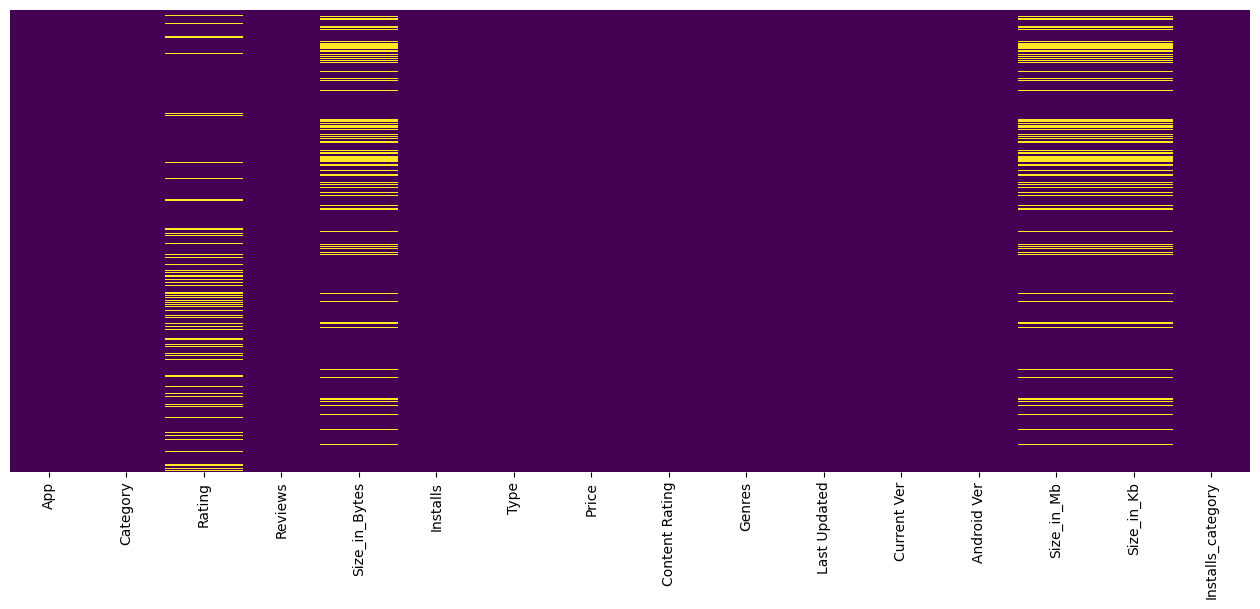

In [473]:
#plot missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Prepare a Barplot of missing values

Text(0.5, 1.0, 'Percentage of missing Values in each column')

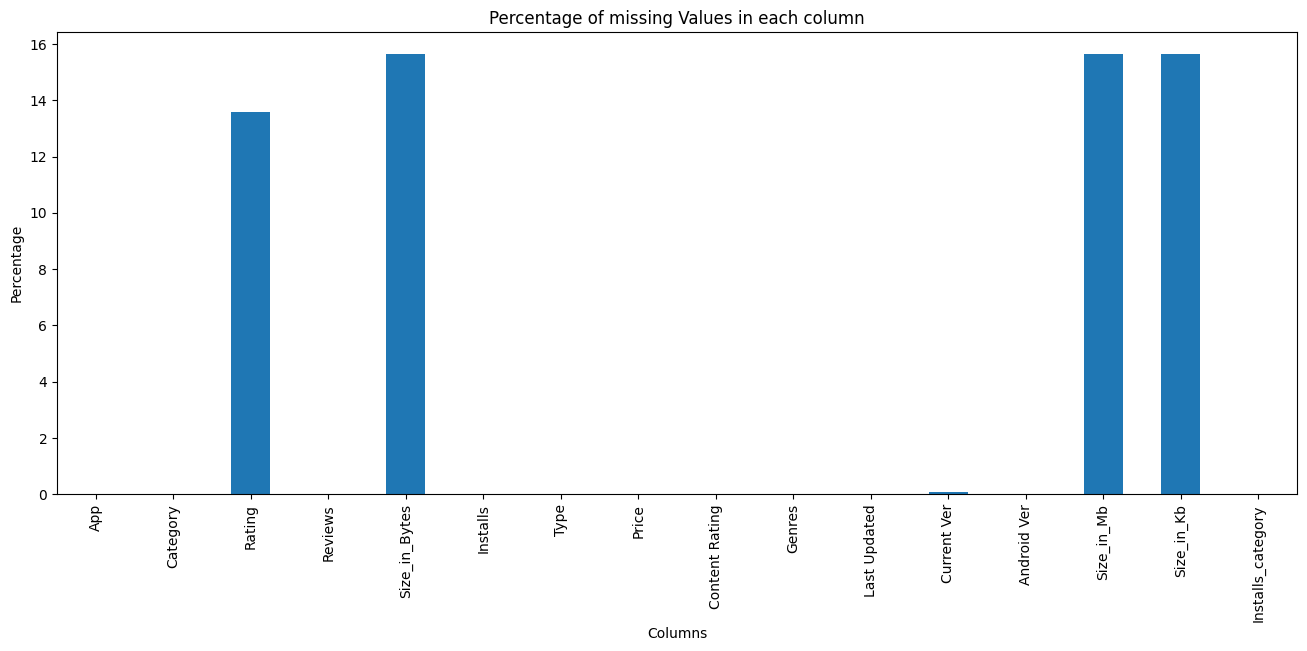

In [474]:
#make figure size
plt.figure(figsize=(16,6))
#plot the null values by their percentage in each column
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing Values in each column')

<AxesSubplot: >

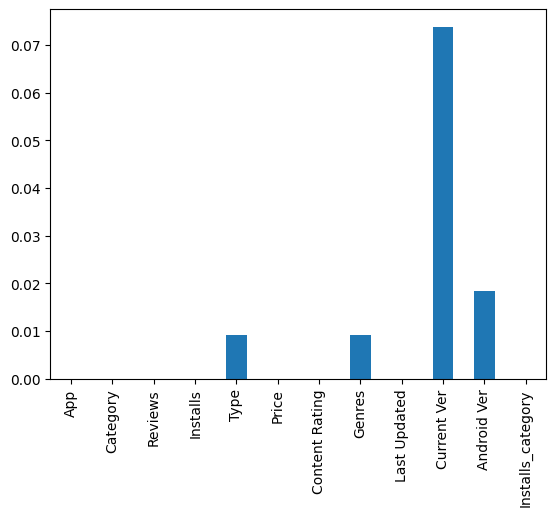

In [475]:
# Display value less than 1%
missing_percentage[missing_percentage < 1].plot(kind='bar')

--Let's plot the missing values other than 'Rating','Size_in_Bytes' and 'Size_in_Mb' column.\
--We have missing percentage columns other than rating having less than one percent of missing values,we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating')

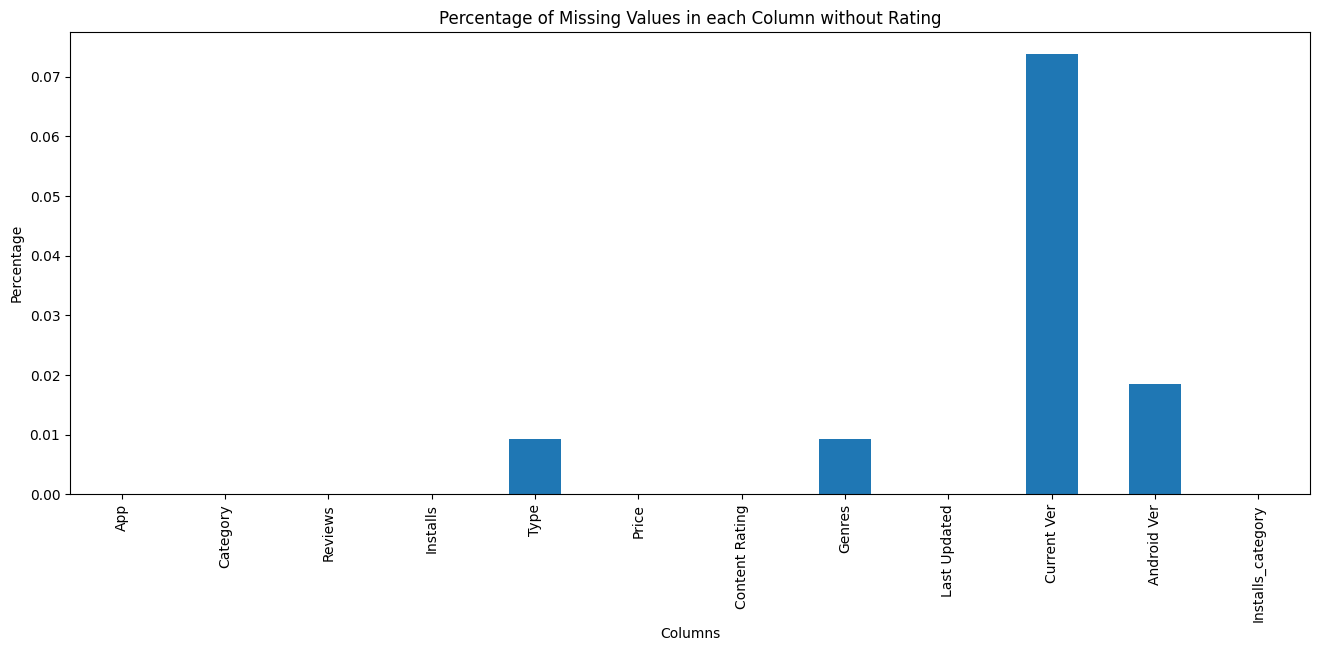

In [480]:
# Display value less than 2%
plt.figure(figsize=(16,6)) #make figure size
missing_percentage[missing_percentage<1].plot(kind='bar') #plot the null value
plt.xlabel('Columns') #add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating')

In [482]:
# this will show the number of null values in descending order.
df.isnull().sum().sort_values(ascending=False) 

Size_in_Bytes        1695
Size_in_Mb           1695
Size_in_Kb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Genres                  1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [485]:
(df.isnull().sum() / len(df)*100).sort_values(ascending=False) # this will show the number of null values in percentage.

Size_in_Bytes        15.635089
Size_in_Mb           15.635089
Size_in_Kb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Type                  0.009224
Genres                0.009224
App                   0.000000
Category              0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

## Observations

---------------
--We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns,which is 15.6% of the total values in the column.\
--We have 1474 missing values in the 'Current Ver' column,which is 0.07% of the total values in the column.\
--We have 2 missing values in the 'Android Ver' column,which is 0.01% of the total values in the column.\
--We have only 1 missing value in Category,Type and Generes columns,which is 0.009% of the total values in the column.


# 2.3. Dealing with Misssing Values
--We can not impute the Rating column as is directly linked with the installation column.To test this Hypothesis we need to plot
the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.

--Let's run the correlations

In [486]:
df.describe() # these are numeric columns

Rating       Reviews  Size_in_Bytes      Installs         Price  \
count  9367.000000  1.084100e+04   9.146000e+03  1.084100e+04  10841.000000   
mean      4.191513  4.441119e+05   4.457416e+07  1.546291e+07      1.027273   
std       0.515735  2.927629e+06   4.683121e+07  8.502557e+07     15.948971   
min       1.000000  0.000000e+00   8.704000e+03  0.000000e+00      0.000000   
25%       4.000000  3.800000e+01   1.015562e+07  1.000000e+03      0.000000   
50%       4.300000  2.094000e+03   2.694349e+07  1.000000e+05      0.000000   
75%       4.500000  5.476800e+04   6.217728e+07  5.000000e+06      0.000000   
max       5.000000  7.815831e+07   2.072576e+08  1.000000e+09    400.000000   

        Size_in_Mb     Size_in_Kb  
count  9146.000000    9146.000000  
mean     42.509231   43529.452537  
std      44.661726   45733.606949  
min       0.008301       8.500000  
25%       9.685156    9917.600000  
50%      25.695312   26312.000000  
75%      59.296875   60720.000000  
max     197.656250  202400.000000

<AxesSubplot: >

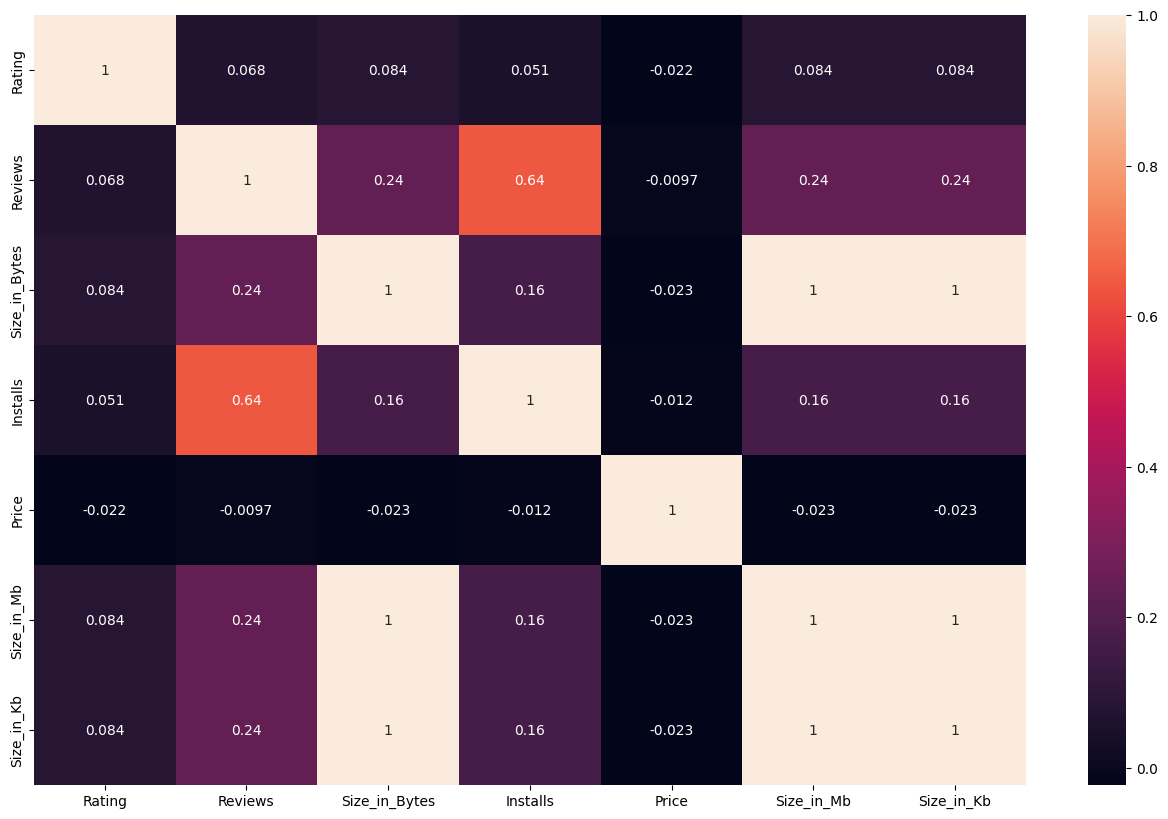

In [489]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16,10)) # make figure size
numeric_cols=['Rating','Reviews','Size_in_Bytes','Installs','Price','Size_in_Mb','Size_in_Kb']
sns.heatmap(df[numeric_cols].corr(),annot=True) # plot the correlation matrix

In [490]:
# We can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlcation matrix

Rating   Reviews  Size_in_Bytes  Installs     Price  \
Rating         1.000000  0.068147       0.084151  0.051393 -0.021851   
Reviews        0.068147  1.000000       0.238191  0.643123 -0.009666   
Size_in_Bytes  0.084151  0.238191       1.000000  0.164792 -0.023035   
Installs       0.051393  0.643123       0.164792  1.000000 -0.011688   
Price         -0.021851 -0.009666      -0.023035 -0.011688  1.000000   
Size_in_Mb     0.084151  0.238191       1.000000  0.164792 -0.023035   
Size_in_Kb     0.084151  0.238191       1.000000  0.164792 -0.023035   

               Size_in_Mb  Size_in_Kb  
Rating           0.084151    0.084151  
Reviews          0.238191    0.238191  
Size_in_Bytes    1.000000    1.000000  
Installs         0.164792    0.164792  
Price           -0.023035   -0.023035  
Size_in_Mb       1.000000    1.000000  
Size_in_Kb       1.000000    1.000000

In [494]:
# We can calculate teh pearson correlation coefficient using scipy as well as follows\
# this is to install scipy if you have not done it before.
# pip install scipy
from scipy import stats

# remove rows containing NaN or infinite values (Important to Calculate Pearson's R)
df_clean = df.dropna()

#calculate Pearson's R between Rating and Installs
pearson_r,_=stats.pearsonr(df_clean['Reviews'],df_clean['Installs'])
print(f"Pearson's R between reviews and Installs:{pearson_r:.4f}")

Pearson's R between reviews and Installs:0.6262


# Obserations
--Lighter color shows the high correlation and darker color shows the low correlation

--We can see that the Reviews column has a high correlation with the Installs column,which is 0.64 according to corr().Which is quite good.
        This shows that the more the reviews the more the installs are for one app.If in any case we need to impute reviews we have to think of number of install.\
---------If we have an app with 2 installs and we impute the reviews with 1000 or via average reviews then it will be wrong.

--Installs is slightly corrleatedwith Size_in_Mb or Size_in_bytes,which is 0.16,this also shows us the importance of size and installs.But we
can not depend on it as the Peason correlations is very low.

------------------
Before going ahead,let's remove the rows with missing values in the Current Ver.Andriod Ver,Category,Type and Generes columns,as they are very less in
number and will not effect our analysis.

In [495]:
#length before removing null values
print(f"Length of the dataframe before removing null values:{len(df)}")

Length of the dataframe before removing null values:10841


In [496]:
#remove the rows having null values in the 'Current Ver','Android Ver','Category','Type,'Genres'
df.dropna(subset=['Current Ver','Android Ver','Category','Type','Genres'],inplace=True)

In [497]:
#length after removing null values
print (f"Length of the dataframe after removing null values:{len(df)}")

Length of the dataframe after removing null values:10829


----We have removed 12 rows having null values in the Current Ver,Andriod Ver,Category,Type and Generes Columns

In [498]:
# Lets check the Null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes        1694
Size_in_Mb           1694
Size_in_Kb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

# Observaton
--Only Rating and Size_in_Bytes or Size_in_Mb columns are left with missing values.
  We know that we have to be carefull while deadlining with Rating Column, as it is directly linked with the Installs column.
  In Size columns we already know about Varies with device values,which we have converted into null values,we do not need to impute at the moment,as every app has different size and no body can predict that as nearly as possible.

In [500]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Size_in_Kb',
       'Installs_category'],
      dtype='object')

In [501]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

count      mean       std  min  25%  50%  75%  max
Installs_category                                                      
no                     0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
Very low              81.0  4.637037  0.845199  1.0  4.8  5.0  5.0  5.0
Low                 1278.0  4.170970  0.825605  1.0  3.8  4.4  4.8  5.0
Moderate            3056.0  4.066001  0.555036  1.4  3.8  4.2  4.5  5.0
More than moderate  2113.0  4.207525  0.376594  1.8  4.0  4.3  4.5  4.9
High                2004.0  4.287076  0.294902  2.0  4.1  4.3  4.5  4.9
Very High            698.0  4.386533  0.192817  3.1  4.3  4.4  4.5  4.8
Top Notch            130.0  4.309231  0.186126  3.7  4.2  4.3  4.4  4.7

In [502]:
df['Rating'].isnull().sum()

1469

In [503]:
# In which install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Low                   880
Very low              453
Moderate              119
no                     14
More than moderate      3
High                    0
Very High               0
Top Notch               0
Name: Installs_category, dtype: int64

--Lets plot this and have a look

Text(0, 3.5, 'Null values:0')

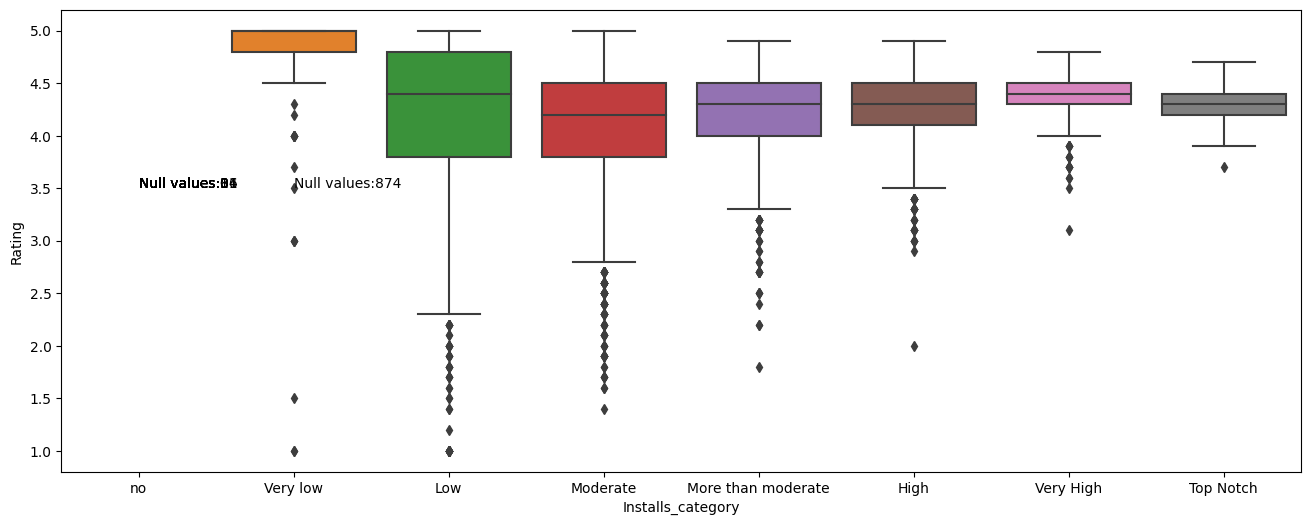

In [504]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16,6)) #make figure size
sns.boxplot(x='Installs_category',y='Rating',data=df) #plot the boxplot
#add the text of number of null values in each category
plt.text(0,3.5,'Null values:14')
plt.text(1,3.5,'Null values:874')
plt.text(0,3.5,'Null values:86')
plt.text(0,3.5,'Null values:31')
plt.text(0,3.5,'Null values:3')
plt.text(0,3.5,'Null values:0')
plt.text(0,3.5,'Null values:0')
plt.text(0,3.5,'Null values:0')

Text(0, 3.5, 'Null values:0')

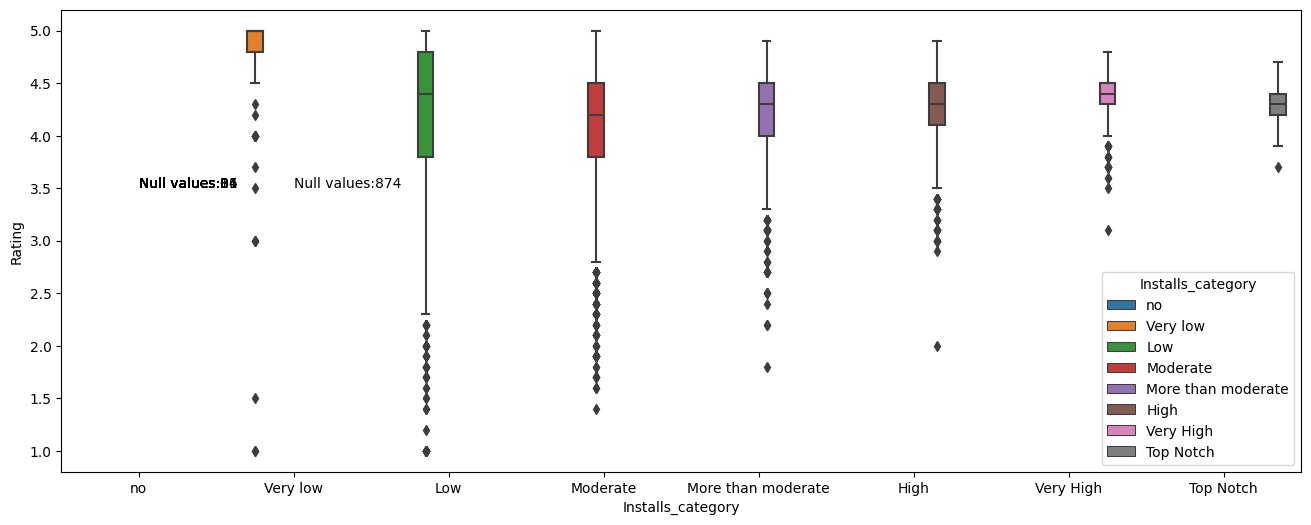

In [508]:
# Another way display with hue
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16,6)) #make figure size
sns.boxplot(x='Installs_category',y='Rating', hue='Installs_category',data=df) #plot the boxplot
#add the text of number of null values in each category
plt.text(0,3.5,'Null values:14')
plt.text(1,3.5,'Null values:874')
plt.text(0,3.5,'Null values:86')
plt.text(0,3.5,'Null values:31')
plt.text(0,3.5,'Null values:3')
plt.text(0,3.5,'Null values:0')
plt.text(0,3.5,'Null values:0')
plt.text(0,3.5,'Null values:0')

In [509]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: Installs_category, dtype: int64

--Replace the respective missing values of Rating,with respect to the average give in each 'Installs Category'!

In [511]:
df['Rating'].isnull().sum()

1469

In [512]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Low                   880
Very low              453
Moderate              119
no                     14
More than moderate      3
High                    0
Very High               0
Top Notch               0
Name: Installs_category, dtype: int64

--Let's check if there is any similar link with Reviews as well


In [513]:
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: Installs_category, dtype: int64

-There is no null values

<AxesSubplot: xlabel='Installs_category', ylabel='Reviews'>

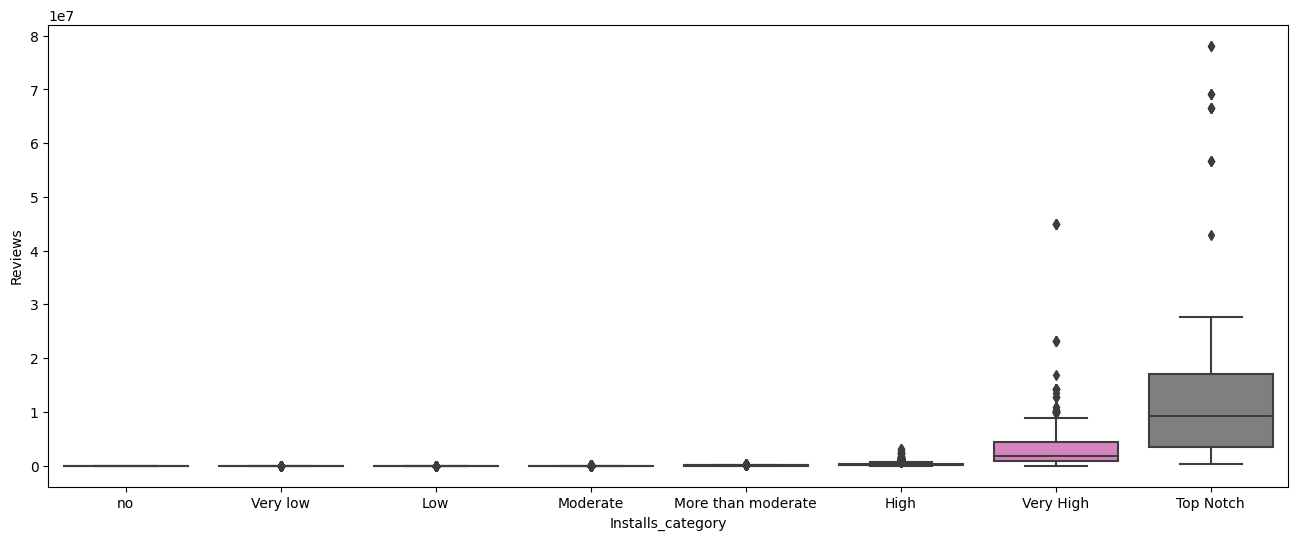

In [515]:
#let's plot the same plots for Reviews column as well
plt.figure(figsize=(16,6)) # make figure size
sns.boxplot(x='Installs_category',y='Reviews',data=df) # plot the boxplot

--The data looks really imbalance , let's normalize the data using log transformation

<AxesSubplot: xlabel='Installs_category', ylabel='Reviews'>

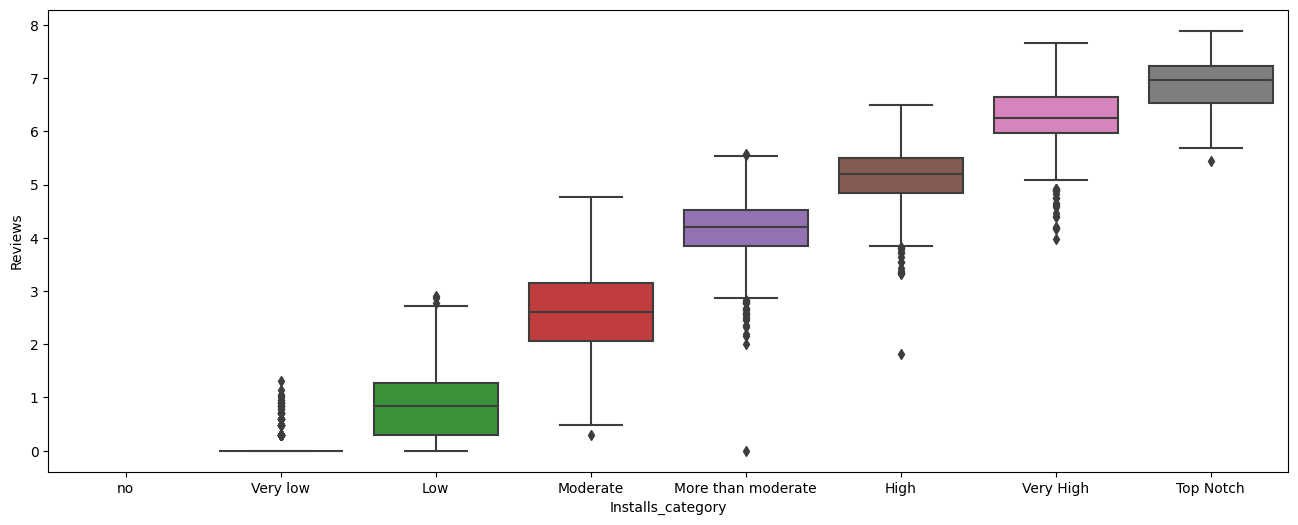

In [517]:
#let's plot the same plots for Reviews column as well
plt.figure(figsize=(16,6)) # make figure size
sns.boxplot(x='Installs_category',y=np.log10(df['Reviews']),data=df) # plot the boxplot

-- We also draw the scatter plot of the Rating and Review columns with the Installs column

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

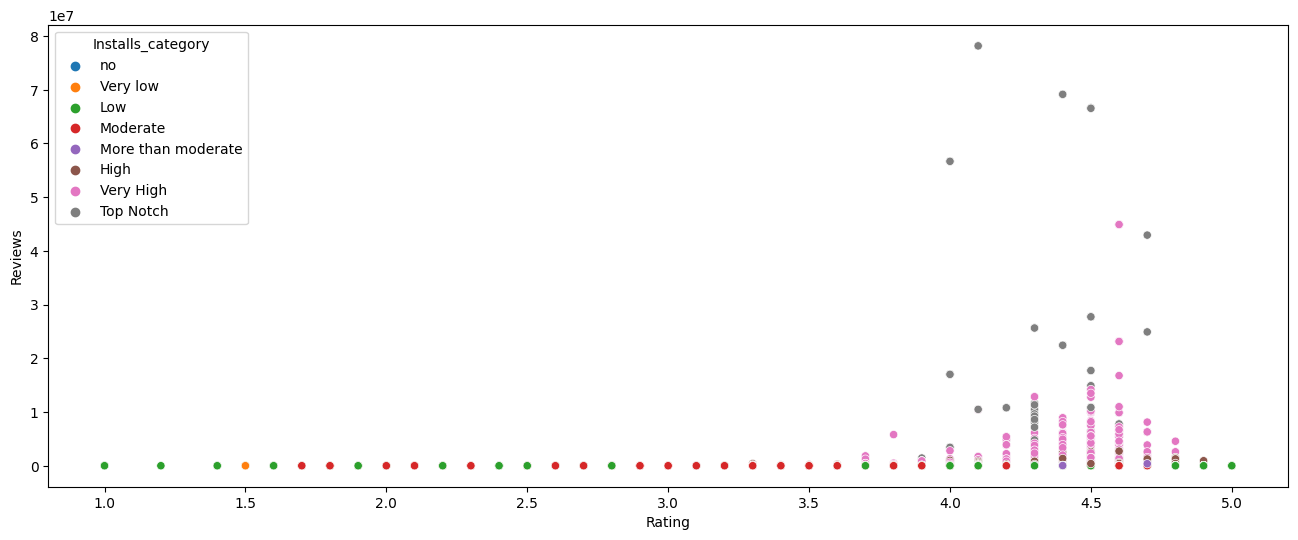

In [519]:
plt.figure(figsize=(16,6)) # make figure size
sns.scatterplot(x='Rating',y='Reviews',hue='Installs_category',data=df) # plot the scatter plot

--It does not show any trend,because you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable,therefore,we can not plot them together.

--Lets try with Reviews and Installs

<AxesSubplot: xlabel='Reviews', ylabel='Installs'>

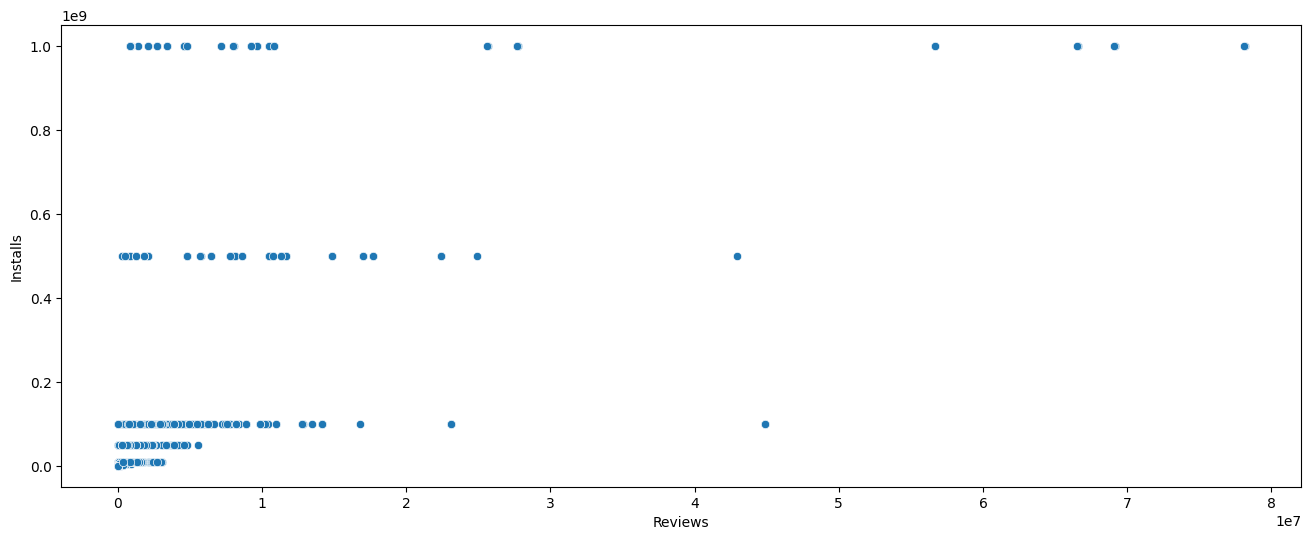

In [520]:
#plot reviews and installs in a scatter plot
plt.figure(figsize=(16,6)) # make figute size
sns.scatterplot(x='Reviews',y='Installs',data=df) # plot the scatter plot

<AxesSubplot: xlabel='Reviews', ylabel='Installs'>

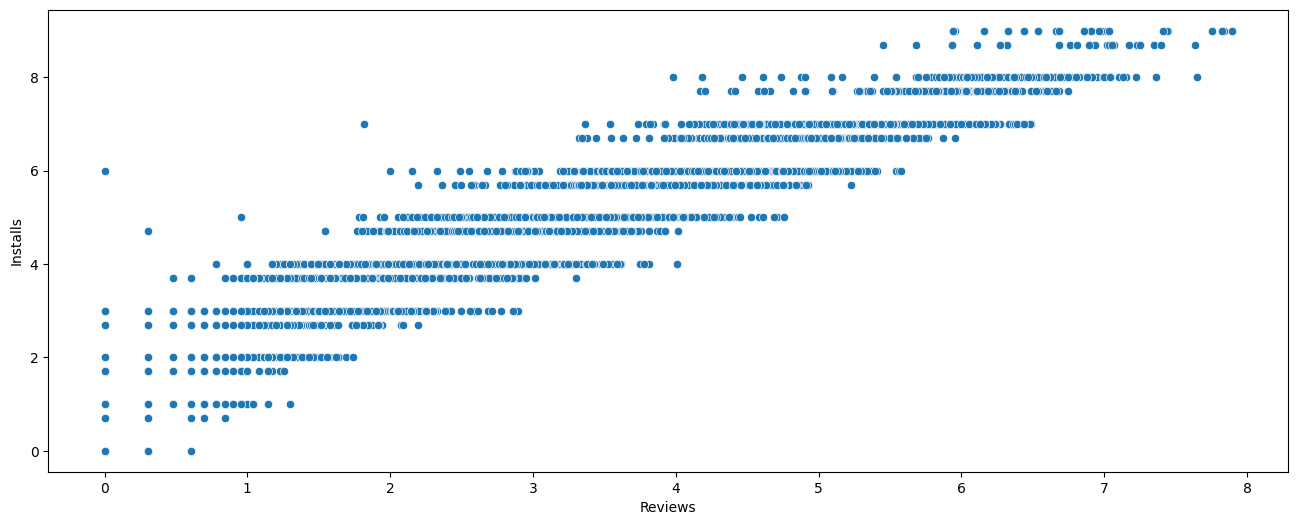

In [521]:
#plot reviews and installs in a scatter plot
plt.figure(figsize=(16,6)) # make figute size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']),data=df) # Plot Scatter Plot

--Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+,20+,1000+ etc, and these are not continuous number but Discrete one,therefore,we can only see a slight trends here.
Let's plot a line plot to see the trend.


<Figure size 1600x600 with 0 Axes>

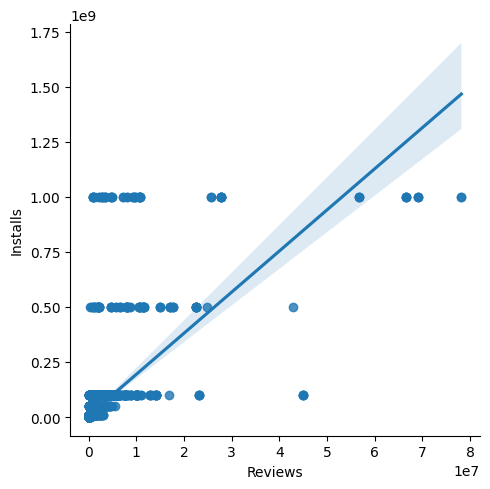

In [522]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16,6)) #make figure size
sns.lmplot(x='Reviews',y='Installs',data=df) #plot the scatter plot with trend line

--Here,we can see a nice trend,which shows that number of Reviews increases with the number of Installs,which is quite obvious.


# Observation
-We can see that most of the null values from Rating column are no-Moderate Installation apps,which make sense that if the app has less installations,it has less Rating and Review.

---But wait,we have to check for the duplicates as well as they can affect our analysis.

# 2.3 Duplicates

-Removing duplicates is one of the most important part of the data wrangling process,we must remove the duplicates in order to get the correct insights from the data.
-If you do not remove duplicates from dataset,it can lead to incorrect insights and analysis.

-Duplicates can skew statistical measures such as mean,median,and standard deviation,and can also lead to over-representation of certain data points.

-It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [524]:
# find duplicate if any 
df.duplicated().sum()

483

# This shows us total duplicates,but we can also check based on the app name,as we know that every app has a unique

In [525]:


#find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

-Oops! we have 1181 duplicate app names

-Can we find a column which can help us to remove the duplicates?

In [529]:
#Let's check for number of duplicates in each column using a for loop and printing the output
for col in df.columns:
    print (f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10789
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_Bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 8046
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Size_in_Kb column are: 10373
Number of duplicates in Installs_category column are: 10821


- This means that the only better way to find duplicates is to check for whole data

In [530]:
# print the number of duplicates in df
print(f"Number of duplicates in df are:{df.duplicated().sum()}")

Number of duplicates in df are:483


-Find and watch all duplidates if they are real!

In [532]:
#find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

App             Category  \
1393                               10 Best Foods for You   HEALTH_AND_FITNESS   
1407                               10 Best Foods for You   HEALTH_AND_FITNESS   
2543                          1800 Contacts - Lens Store              MEDICAL   
2322                          1800 Contacts - Lens Store              MEDICAL   
2385                          2017 EMRA Antibiotic Guide              MEDICAL   
2256                          2017 EMRA Antibiotic Guide              MEDICAL   
1337                        21-Day Meditation Experience   HEALTH_AND_FITNESS   
1434                        21-Day Meditation Experience   HEALTH_AND_FITNESS   
3083                             365Scores - Live Scores               SPORTS   
5415                             365Scores - Live Scores               SPORTS   
7035                              420 BZ Budeze Delivery              MEDICAL   
2522                              420 BZ Budeze Delivery              MEDICAL   
3953                                         8 Ball Pool               SPORTS   
1970                                         8 Ball Pool                 GAME   
1844                                         8 Ball Pool                 GAME   
1755                                         8 Ball Pool                 GAME   
1703                                         8 Ball Pool                 GAME   
1675                                         8 Ball Pool                 GAME   
1871                                         8 Ball Pool                 GAME   
1324                        8fit Workouts & Meal Planner   HEALTH_AND_FITNESS   
1296                        8fit Workouts & Meal Planner   HEALTH_AND_FITNESS   
662                      95Live -SG#1 Live Streaming App               DATING   
559                      95Live -SG#1 Live Streaming App               DATING   
2301                             A Manual of Acupuncture              MEDICAL   
2402                             A Manual of Acupuncture              MEDICAL   
920                A&E - Watch Full Episodes of TV Shows        ENTERTAINMENT   
946                A&E - Watch Full Episodes of TV Shows        ENTERTAINMENT   
4991               A&E - Watch Full Episodes of TV Shows               FAMILY   
977                A&E - Watch Full Episodes of TV Shows        ENTERTAINMENT   
2515                                                AAFP              MEDICAL   
10768                                               AAFP              MEDICAL   
3806                          ABC News - US & World News   NEWS_AND_MAGAZINES   
3787                          ABC News - US & World News   NEWS_AND_MAGAZINES   
4928                       AC - Tips & News for Android™   NEWS_AND_MAGAZINES   
3799                       AC - Tips & News for Android™   NEWS_AND_MAGAZINES   
3791                           AP Mobile - Breaking News   NEWS_AND_MAGAZINES   
5448                           AP Mobile - Breaking News   NEWS_AND_MAGAZINES   
2378                                        ASCCP Mobile              MEDICAL   
2246                                        ASCCP Mobile              MEDICAL   
2800                                                ASOS             SHOPPING   
2771                                                ASOS             SHOPPING   
280                          Accounting App - Zoho Books             BUSINESS   
251                          Accounting App - Zoho Books             BUSINESS   
5512   AccuWeather: Daily Forecast & Live Weather Rep...              WEATHER   
3628   AccuWeather: Daily Forecast & Live Weather Rep...              WEATHER   
1143                        Acorns - Invest Spare Change              FINANCE   
1095                        Acorns - Invest Spare Change              FINANCE   
250                                      AdWords Express             BUSINESS   
279                                      AdWords Express             BUSINESS   
248

-Remove Duplicates

In [533]:
#Remove the duplicates
df.drop_duplicates(inplace=True)

In [534]:
# print the number of rows and columns after removing duplicates
print (f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


--Now we have removed 483 duplicates from the dataset and have 10346 rows left.

# DATA PREPROCESSING PART END NOW
-----Data Cleaning,Anomolies,duplicate removes,missing values remove,abnormalities remove,feature engineering done,conversion of size done,null values impute,
but Outlier still pending.

# 3. Insights from Data
## 3.1 which category has the highest number of apps?

In [535]:
# which category has highest numbr of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps



FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: Category, dtype: int64

# 3.2 Which category has the highest number of Installs?

In [536]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# 3.3 Which category has the highest number of Reviews?

In [537]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# 3.4 Which category has the highest rating?

In [538]:
# Category has the highest rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<AxesSubplot: xlabel='Rating', ylabel='Density'>

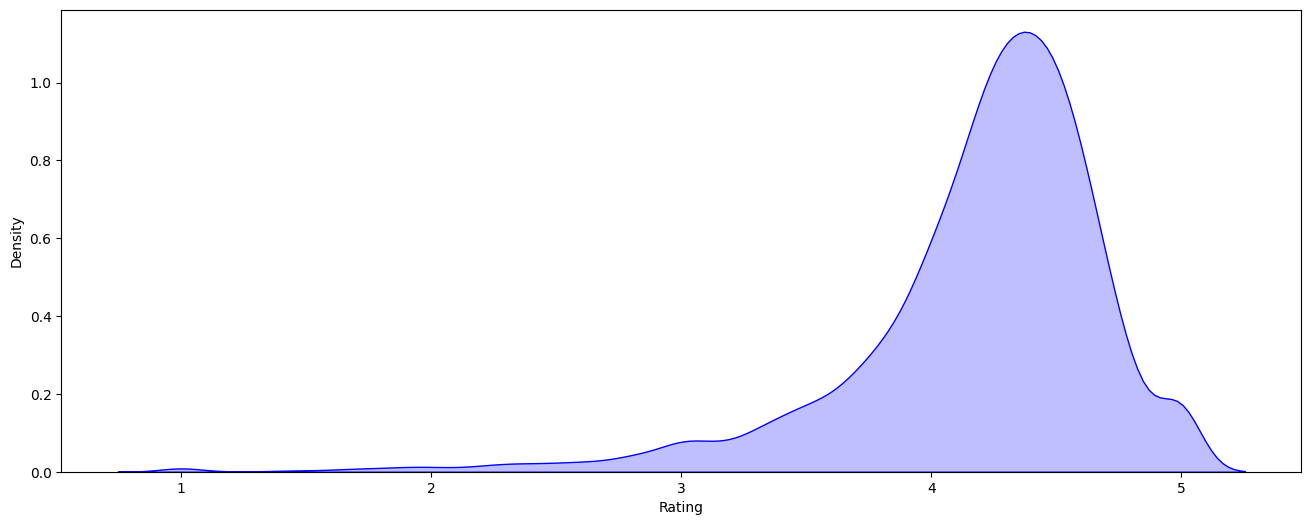

In [539]:
# plot the rating distribution
plt.figure(figsize=(16,6)) # make figure size
sns.kdeplot(df['Rating'],color="blue",shade=True) # plot the distribution plot

In [540]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_Bytes  Installs  Type  Price Content Rating  \
0      159     39378944.0     10000  Free    0.0       Everyone   
1      967     29016064.0    500000  Free    0.0       Everyone   
2    87510     18031411.2   5000000  Free    0.0       Everyone   
3   215644     51814400.0  50000000  Free    0.0           Teen   
4      967      5803212.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play    15-Jan-18               2.0.0  4.0.3 and up   
2               Art & Design     1-Aug-18               1.2.4  4.0.3 and up   
3               Art & Design     8-Jun-18  Varies with device    4.2 and up   
4    Art & Design;Creativity    20-Jun-18                 1.1    4.4 and up   

   Size_in_Mb  Size_in_Kb   Installs_category  
0   37.554688     38456.0            Moderate  
1   27.671875     28336.0  More than moderate  
2   17.196094     17608.8                High  
3   49.414062     50600.0           Very High  
4    5.534375      5667.2            Moderate

<AxesSubplot: xlabel='Type', ylabel='Installs'>

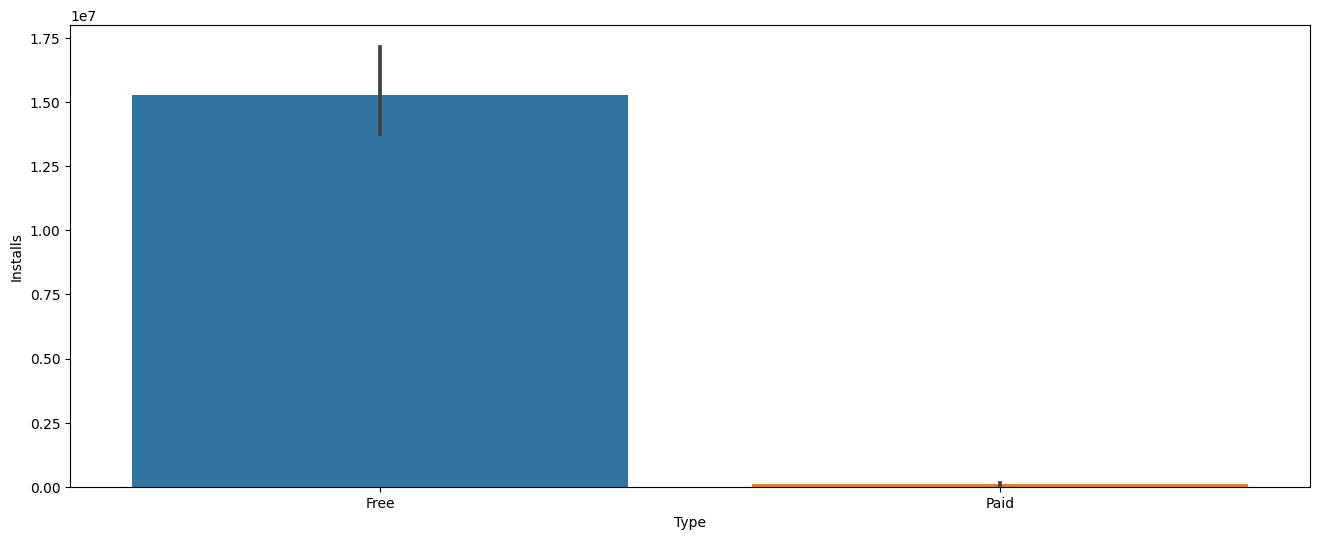

In [542]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16,6)) # make figure size
sns.barplot(x='Type',y='Installs', data=df) # plot the bar plot



<AxesSubplot: xlabel='Installs', ylabel='Price'>

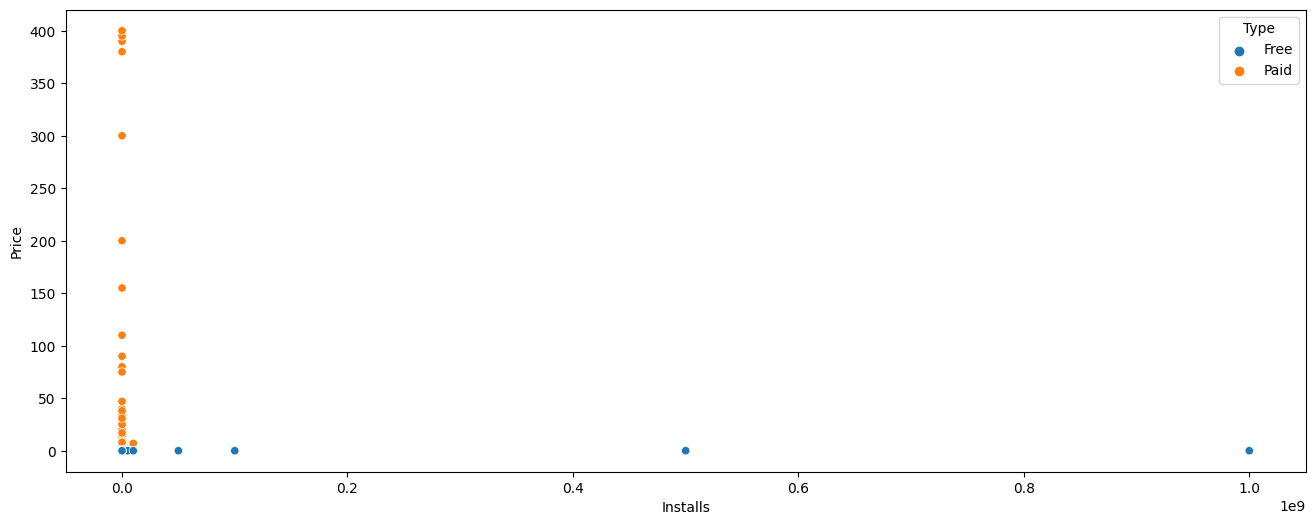

In [543]:
#show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type 
plt.figure(figsize=(16,6)) # make figure size
sns.scatterplot(x='Installs',y='Price', hue='Type',data=df) # plot the scatter plot

<AxesSubplot: xlabel='Installs_category', ylabel='Size_in_Mb'>

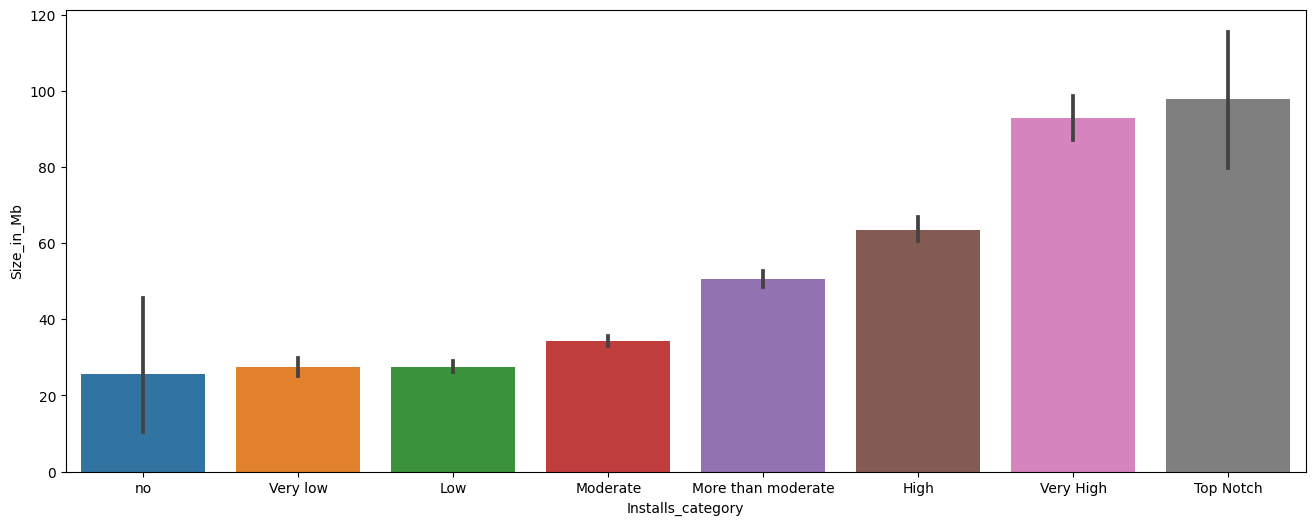

In [544]:
#check if there is any impact of size on Installs
#make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16,6)) # make figure size
sns.barplot(x='Installs_category',y='Size_in_Mb',data=df) #plot the bar plot

In [545]:
#Which content rating is most popular in Installs
df['Content Rating'].value_counts() #this will show the value counts of each content rating

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<AxesSubplot: xlabel='Content Rating', ylabel='Installs'>

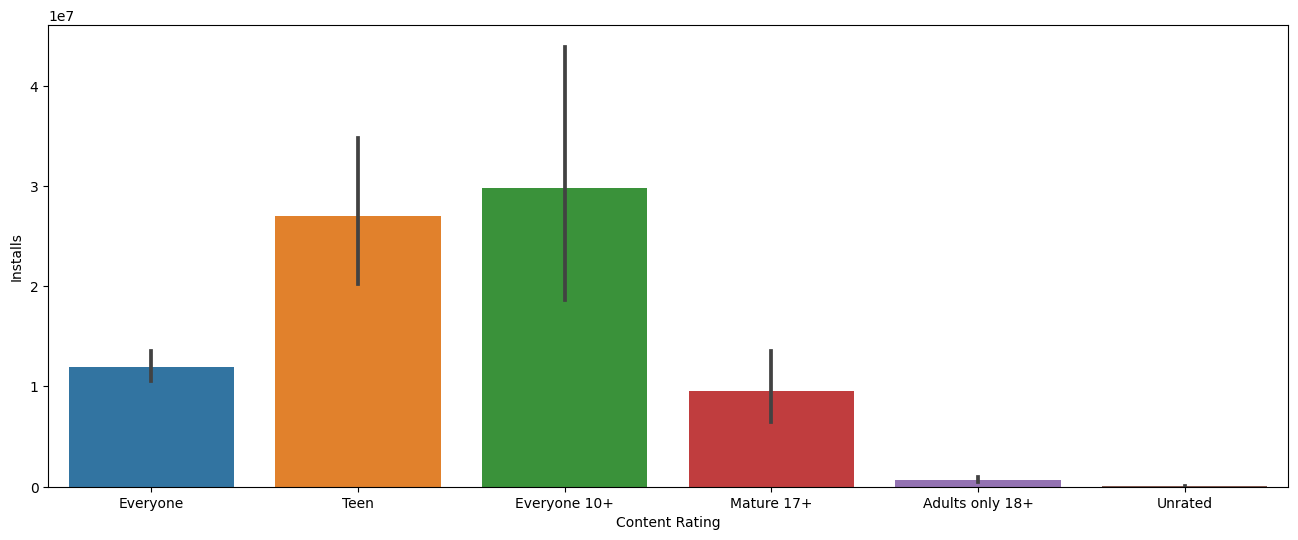

In [546]:
#plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16,6)) # make figure size
sns.barplot(x='Content Rating', y='Installs',data=df) #plot the bar plot

In [547]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: Category, dtype: int64

<AxesSubplot: xlabel='App', ylabel='Rating'>

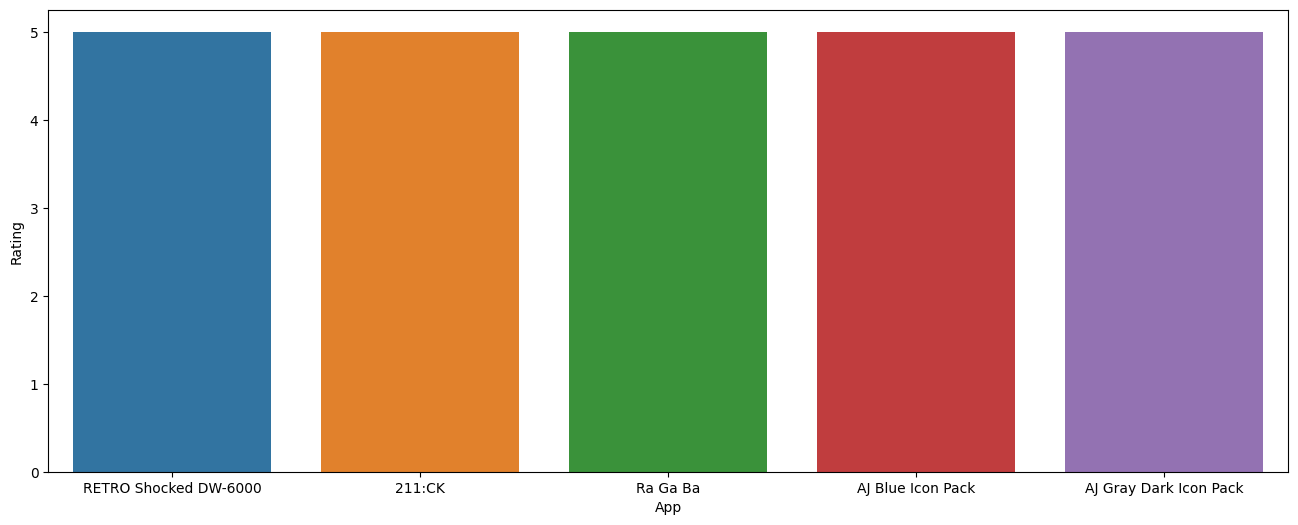

In [549]:
#plot top 5 paid apps
plt.figure(figsize=(16,6)) #make figure size
sns.barplot(x='App',y='Rating',data=df[df['Type'] == 'Paid'].sort_values(by='Rating',ascending=False).head(5))

In [550]:
df[df['Type']=='Paid'].sort_values(by='Rating',ascending=False).head(5)

App         Category  Rating  Reviews  Size_in_Bytes  \
9010   RETRO Shocked DW-6000  PERSONALIZATION     5.0       13       512000.0   
7466                  211:CK             GAME     5.0        8     78757888.0   
5917                Ra Ga Ba             GAME     5.0        2     41451520.0   
5263       AJ Blue Icon Pack  PERSONALIZATION     5.0        4     64249856.0   
5260  AJ Gray Dark Icon Pack  PERSONALIZATION     5.0        2     72540160.0   

      Installs  Type  Price Content Rating           Genres Last Updated  \
9010       100  Paid   1.49       Everyone  Personalization     4-Apr-17   
7466        10  Paid   0.99           Teen           Arcade    11-Apr-18   
5917         1  Paid   1.49       Everyone           Arcade     8-Feb-17   
5263        50  Paid   0.99       Everyone  Personalization    27-Apr-18   
5260        10  Paid   0.99       Everyone  Personalization    29-Apr-18   

     Current Ver Android Ver  Size_in_Mb  Size_in_Kb Installs_category  
9010         1.2  2.3 and up    0.488281       500.0               Low  
7466         1.3  4.1 and up   75.109375     76912.0          Very low  
5917       1.0.4  2.3 and up   39.531250     40480.0          Very low  
5263         1.1  4.1 and up   61.273438     62744.0               Low  
5260         1.1  4.1 and up   69.179688     70840.0          Very low

<AxesSubplot: xlabel='App', ylabel='Rating'>

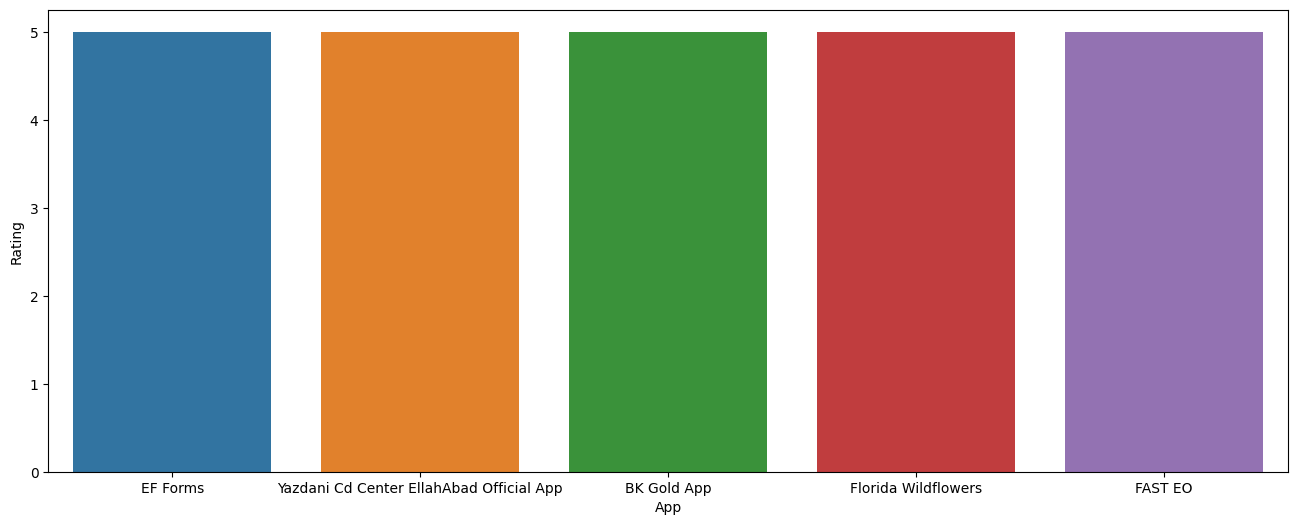

In [553]:
#plot top rated 5 apps in free category
plt.figure(figsize=(16,6)) # make figure size
sns.barplot(x='App', y='Rating',data=df[df['Type'] == 'Free'].sort_values(by='Rating',ascending=False).head(5))

In [554]:
df[df['Type'] == 'Free'].sort_values(by='Rating',ascending=False).head(5)

App  Category  Rating  Reviews  \
9290                                   EF Forms  BUSINESS     5.0        2   
7170   Yazdani Cd Center EllahAbad Official App    FAMILY     5.0        8   
6398                                BK Gold App   FINANCE     5.0        4   
10629                       Florida Wildflowers    FAMILY     5.0        5   
9659                                    FAST EO    EVENTS     5.0        1   

       Size_in_Bytes  Installs  Type  Price Content Rating         Genres  \
9290      47669248.0        50  Free    0.0       Everyone       Business   
7170       7875788.8       500  Free    0.0       Everyone  Entertainment   
6398      22798336.0        50  Free    0.0       Everyone        Finance   
10629    143007744.0      1000  Free    0.0       Everyone      Education   
9659             NaN        10  Free    0.0       Everyone         Events   

      Last Updated Current Ver Android Ver  Size_in_Mb  Size_in_Kb  \
9290     24-Jul-18        1.29  4.4 and up   45.460938     46552.0   
7170     12-Jan-18           2  4.0 and up    7.510937      7691.2   
6398     25-May-18       1.0.0  4.4 and up   21.742188     22264.0   
10629    10-Jul-17         1.5  4.1 and up  136.382812    139656.0   
9659     15-May-18       1.0.3  4.1 and up         NaN         NaN   

      Installs_category  
9290                Low  
7170                Low  
6398                Low  
10629               Low  
9659           Very low

<AxesSubplot: xlabel='App', ylabel='Reviews'>

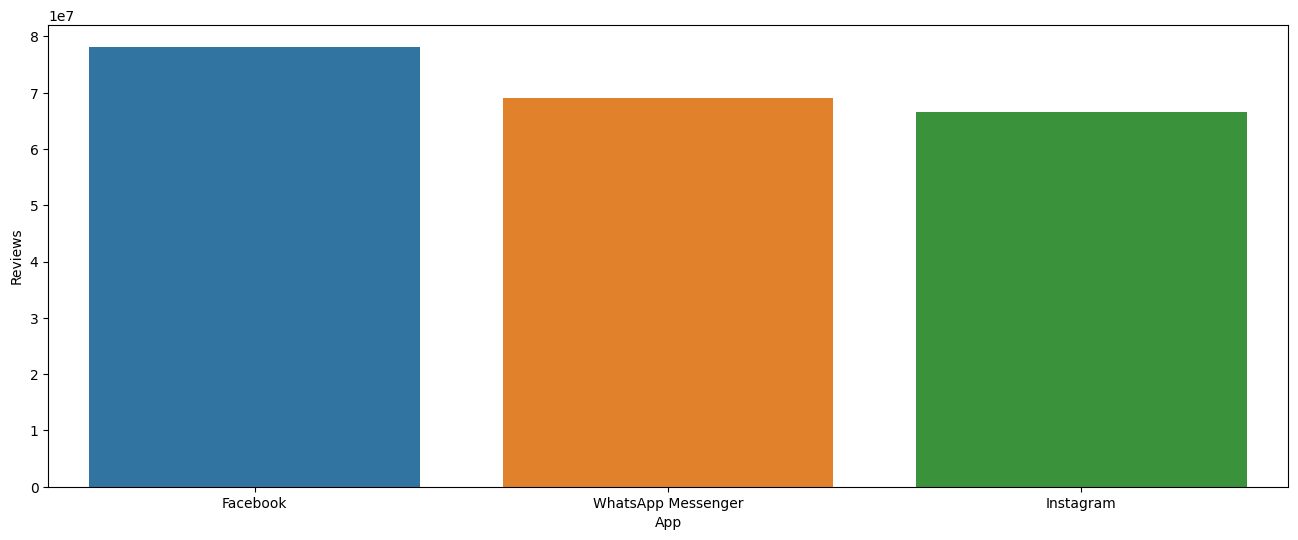

In [556]:
#plot top 5 Free apps with higest number of reviews
plt.figure(figsize=(16,6)) #make figure size
sns.barplot(x='App',y='Reviews',data=df[df['Type'] == 'Free'].sort_values(by='Reviews',ascending=False).head(5))